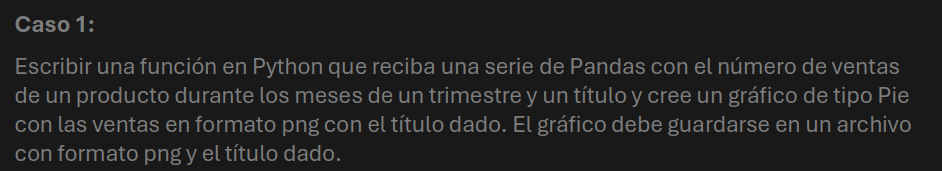

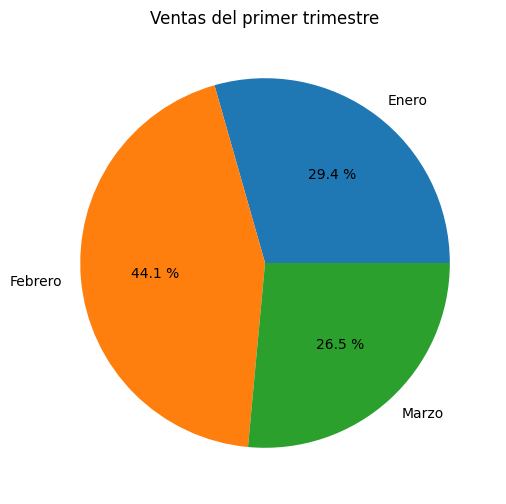

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def grafico_pie(ventas, titulo):
  plt.figure(figsize=(6, 6))
  ventas.plot(kind='pie', title=titulo, autopct='%1.1f %%')
  plt.savefig(f'{titulo}.png')
  plt.plot()

ventas = pd.Series([100, 150, 90], index=['Enero', 'Febrero', 'Marzo'])
grafico_pie(ventas, 'Ventas del primer trimestre')

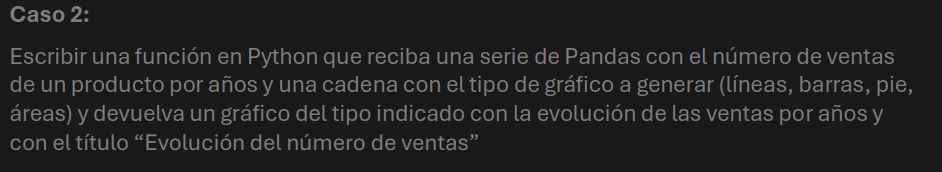

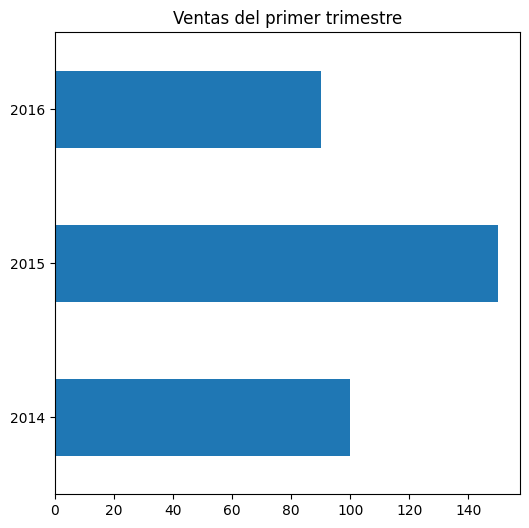

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def grafico(ventas, titulo, tipo):
  plt.figure(figsize=(6, 6))
  if tipo == 'pie':
    ventas.plot(kind=tipo, title=titulo, autopct='%1.1f %%')
  else:
    ventas.plot(kind=tipo, title=titulo)
  plt.savefig(f'{titulo}.png')
  plt.plot()

ventas = pd.Series([100, 150, 90], index=[2014,2015, 2016])
grafico(ventas, 'Ventas del primer trimestre', 'barh')

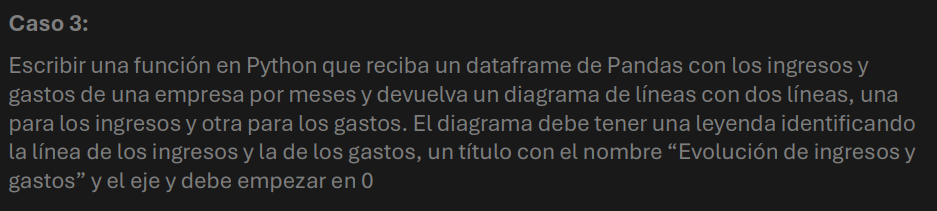

<Figure size 600x600 with 0 Axes>

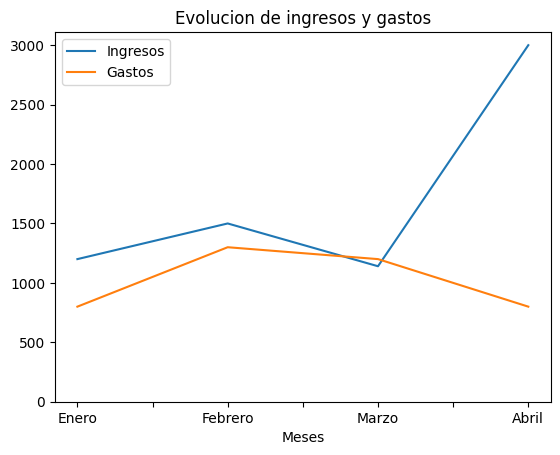

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def grafico_line(ventas, titulo):
  plt.figure(figsize=(6, 6))
  ventas.plot(kind='line', title=titulo, ylim=(0))
  plt.savefig(f'{titulo}.png')
  plt.plot()

empresa = {
    'Ingresos': [1200, 1500, 1140, 3000],
    'Gastos': [800, 1300, 1200, 800],
    'Meses': ['Enero', 'Febrero', 'Marzo', 'Abril']
}

ventas = pd.DataFrame(empresa).set_index('Meses')
grafico_line(ventas, 'Evolucion de ingresos y gastos')

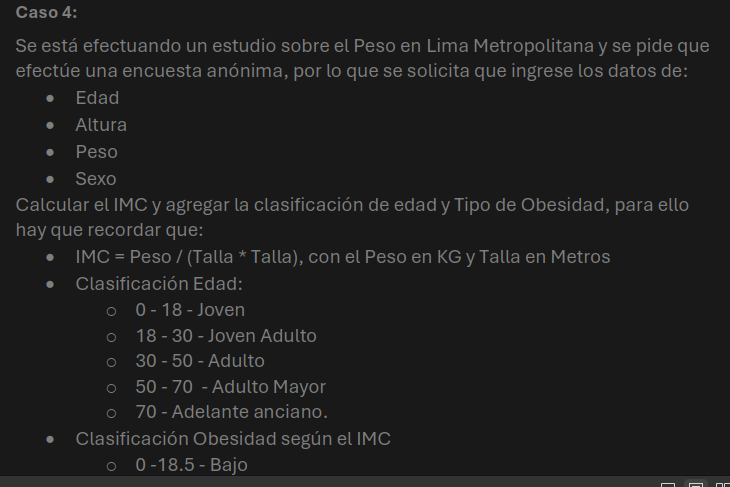

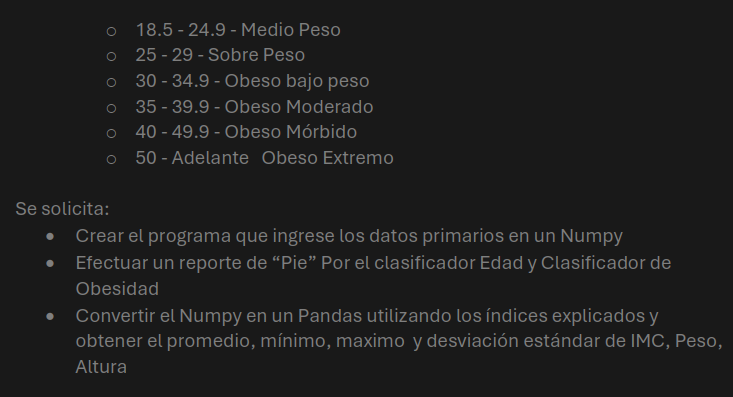

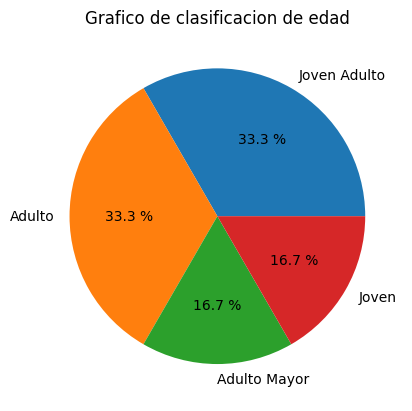

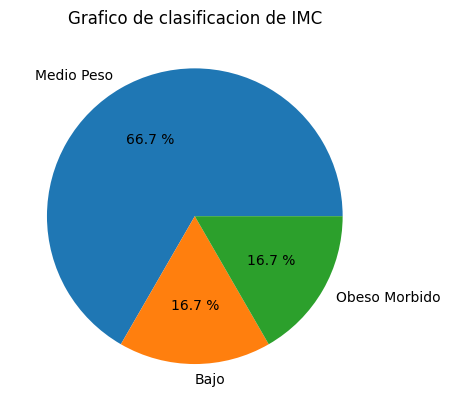

,Edad,Talla,Peso,IMC
mean,34.833333,1.725,68.5,NaN
max,70.000000,NaN,NaN,NaN
std,19.467066,NaN,NaN,9.097978
min,NaN,NaN,50.0,15.780836


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
datos = np.array(
    [
        [25, 1.75, 68, 'Masculino'],
        [23, 1.78, 50, 'Femenino'],
        [40, 1.64, 60, 'Masculino'],
        [36, 1.95, 75, 'Masculino'],
        [70, 1.55, 100, 'Femenino'],
        [15, 1.68, 58, 'Masculino'],
    ], dtype='object'
)
imc = datos[:,2] /(datos[:,1] ** 2)
clasificar_edad = np.select(
    [
        datos[:, 0] <=18,
        (datos[:, 0] >18) & (datos[:, 0] <=30),
        (datos[:, 0] >30) & (datos[:, 0] <=50),
        (datos[:, 0] >50) & (datos[:, 0] <=70),
        datos[:, 0] >70
    ],
    [
        'Joven', 'Joven Adulto', 'Adulto', 'Adulto Mayor', 'Anciano'
    ]
)
clasificar_imc = np.select(
    [
        imc <=18.5,
        (imc >18.5) & (imc <=24.9),
        (imc>24.9) & (imc <=29),
        (imc >29) & (imc <=34.9),
        (imc >34.9) & (imc <=39.9),
        (imc >39.9) & (imc <=49.9),
        imc >50
    ],
    [
        'Bajo', 'Medio Peso', 'Sobre Peso', 'Obeso Bajo Peso', 'Obeso Moderado', 'Obeso Morbido', 'Obeso Extremo'
    ]
)
df = pd.DataFrame(datos, columns=['Edad', 'Talla', 'Peso', 'Genero'])
df['IMC'] = imc
df['Clasi Edad'] = clasificar_edad
df['Clasi IMC'] = clasificar_imc
df['Clasi Edad'].value_counts().plot(kind='pie', ylabel = '', title = 'Grafico de clasificacion de edad', autopct='%1.1f %%')
plt.show()
df['Clasi IMC'].value_counts().plot(kind='pie', ylabel = '', title = 'Grafico de clasificacion de IMC', autopct='%1.1f %%')
plt.show()

df[['Edad', 'Talla', 'Peso','IMC']].agg({
    'Edad': ['mean', 'max', 'std'],
    'Talla': ['mean'],
    'Peso': ['min', 'mean'],
    'IMC': ['std', 'min']
})

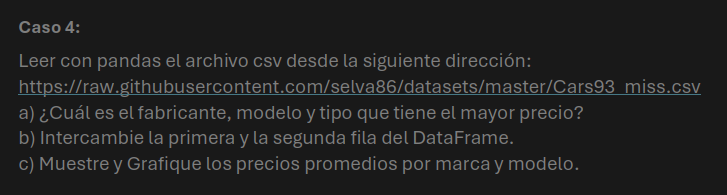

   Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0         Acura  Integra    Small       12.9   15.9       18.8      25.0   
1           NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2          Audi       90  Compact       25.9   29.1       32.3      20.0   
3          Audi      100  Midsize        NaN   37.7       44.6      19.0   
4           BMW     535i  Midsize        NaN   30.0        NaN      22.0   
..          ...      ...      ...        ...    ...        ...       ...   
88   Volkswagen  Eurovan      Van       16.6   19.7       22.7      17.0   
89   Volkswagen   Passat  Compact       17.6   20.0       22.4      21.0   
90   Volkswagen  Corrado   Sporty       22.9   23.3       23.7      18.0   
91        Volvo      240  Compact       21.8   22.7       23.5      21.0   
92          NaN      850  Midsize       24.8   26.7       28.5      20.0   

    MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0          31

[]

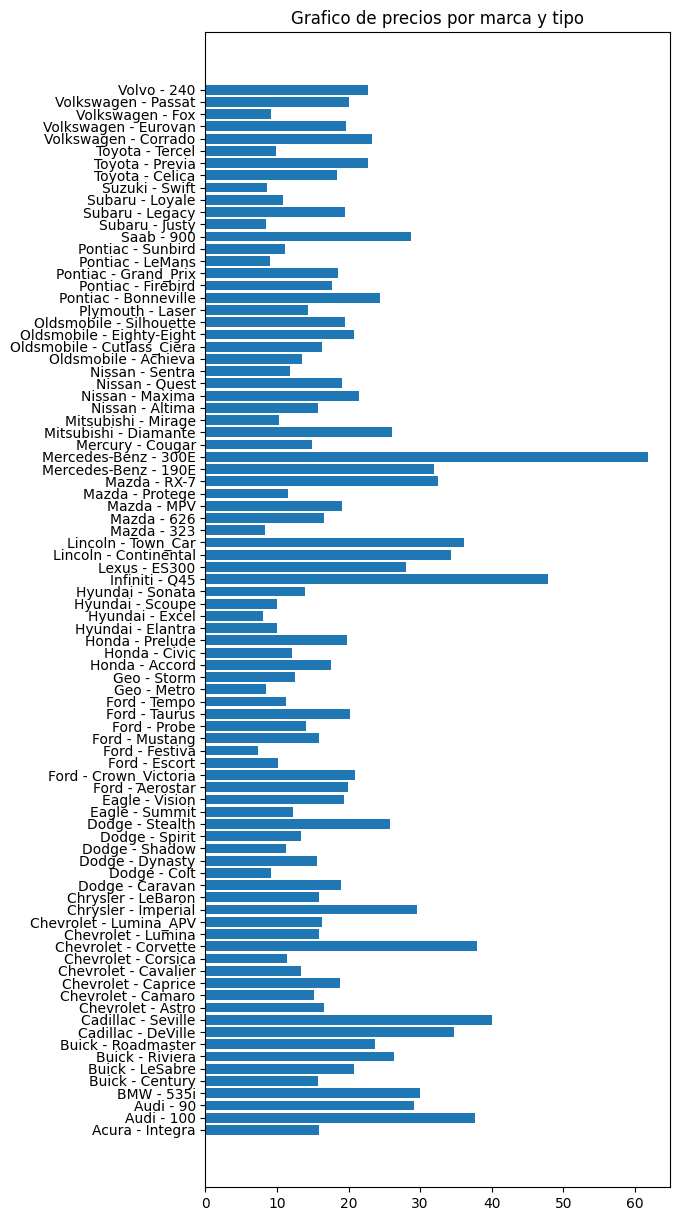

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

df_datos = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
print(df_datos)
print("El frabricante, modelo, y tipo del que tiene mayor precio es: ")
print(df_datos.loc[df_datos['Max.Price'].idxmax(), ['Manufacturer','Model','Type']])
df_datos.iloc[[0, 1]] = df_datos.iloc[[1, 0]].values
print("Los datos cambiados son:\n", df_datos.head(3))
precios= df_datos.groupby(['Manufacturer', 'Model'])['Price'].mean().dropna()
plt.figure(figsize=(6, 15))
precios.index =precios.index.map(lambda x: f'{x[0]} - {x[1]}')
plt.barh(precios.index, precios.values)
plt.title('Grafico de precios por marca y tipo')
plt.plot()